In [2]:
#import libraries

import pyreadr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import os

In [12]:
#set working directory 
path = "/Users/dangngochuy/Desktop/Hertie/Hertie 3rd semester/Machine Learning/Predicting-German-Election/Code/Transformed Data"
os.chdir(path)

#load data
afd = pd.read_csv("combined_data_afd.csv", index_col='date', parse_dates=True)
afd.head()

,support
date,
2013-10-23,5.045125
2013-10-24,5.051701
2013-10-25,5.058277
2013-10-26,5.049102
2013-10-27,5.039927


In [13]:
type(afd)

pandas.core.frame.DataFrame

In [15]:
#import libraries 

import talib
import numpy as np
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor

In [17]:
# Create 3-day % changes of support for the current day, and 3 days in the future

afd['3d_future'] = afd['support'].shift(-3)
afd['3d_future_pct'] = afd['3d_future'].pct_change(3)
afd['3d_pct'] = afd['support'].pct_change(3)

In [18]:
#look at the new dataframe

afd.head(10)

,support,3d_future,3d_future_pct,3d_pct
date,,,,
2013-10-23,5.045125,5.049102,NaN,NaN
2013-10-24,5.051701,5.039927,NaN,NaN
2013-10-25,5.058277,5.030752,NaN,NaN
2013-10-26,5.049102,5.021577,-0.005451,0.000788
2013-10-27,5.039927,5.012402,-0.005461,-0.002331
2013-10-28,5.030752,4.985086,-0.009077,-0.005442
2013-10-29,5.021577,4.957771,-0.012706,-0.005451
2013-10-30,5.012402,4.930455,-0.016349,-0.005461
2013-10-31,4.985086,4.903140,-0.016438,-0.009077


In [19]:
# Calculate the correlation matrix between the 3d close pecentage changes (current and future)

corr = afd[['3d_pct', '3d_future_pct']].corr()
print(corr)

                 3d_pct  3d_future_pct
3d_pct         1.000000       0.826682
3d_future_pct  0.826682       1.000000


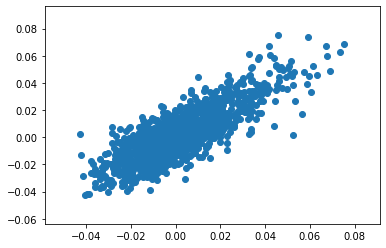

In [20]:
# Scatter the current 3-day percent change vs the future 3-day percent change
plt.scatter(afd['3d_pct'], afd['3d_future_pct'])
plt.show()

In [21]:
feature_names = ['3d_future_pct']  # a list of the feature names for later

# Create moving averages timeperiods of 3, 5, 10, 20, 30, 50, 100 and 200
for n in [3, 5, 10, 20, 30, 50, 100, 200]:

    # Create the moving average indicator and divide by support
    afd['ma' + str(n)] = talib.SMA(afd['support'].values,
                              timeperiod=n) / afd['support']
    # Create the RSI indicator
    #df_2017_allen_afd['rsi' + str(n)] = talib.RSI(df_2017_allen_afd['support'].values, timeperiod=n)
    
    # Add rsi and moving average to the feature name list
    feature_names = feature_names + ['ma' + str(n)]
print(feature_names)

['3d_future_pct', 'ma3', 'ma5', 'ma10', 'ma20', 'ma30', 'ma50', 'ma100', 'ma200']


In [22]:
afd.head(10)

,support,3d_future,3d_future_pct,3d_pct,ma3,ma5,ma10,ma20,ma30,ma50,ma100,ma200
date,,,,,,,,,,,,
2013-10-23,5.045125,5.049102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-24,5.051701,5.039927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-25,5.058277,5.030752,NaN,NaN,0.998700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-26,5.049102,5.021577,-0.005451,0.000788,1.000777,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-27,5.039927,5.012402,-0.005461,-0.002331,1.001820,1.001766,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-28,5.030752,4.985086,-0.009077,-0.005442,1.001824,1.003021,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-29,5.021577,4.957771,-0.012706,-0.005451,1.001827,1.003654,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-30,5.012402,4.930455,-0.016349,-0.005461,1.001830,1.003661,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-31,4.985086,4.903140,-0.016438,-0.009077,1.004266,1.006592,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
afd = afd.dropna()

# Create features and targets
# use feature_names for features; '5d_close_future_pct' for targets
features = afd[feature_names]
targets = afd['3d_future']

# Create DataFrame from target column and feature columns
feature_and_target_cols = ['3d_future'] + feature_names
feat_targ_df = afd[feature_and_target_cols]

# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

               3d_future  3d_future_pct       ma3       ma5      ma10  \
3d_future       1.000000      -0.008360 -0.025240 -0.033800 -0.054165   
3d_future_pct  -0.008360       1.000000 -0.876394 -0.842908 -0.767097   
ma3            -0.025240      -0.876394  1.000000  0.987663  0.921327   
ma5            -0.033800      -0.842908  0.987663  1.000000  0.962591   
ma10           -0.054165      -0.767097  0.921327  0.962591  1.000000   
ma20           -0.092885      -0.705962  0.820214  0.864789  0.946686   
ma30           -0.129848      -0.661659  0.760178  0.802037  0.887289   
ma50           -0.193587      -0.565416  0.650390  0.688407  0.772664   
ma100          -0.297369      -0.396802  0.467892  0.498695  0.569671   
ma200          -0.416823      -0.270331  0.326278  0.349714  0.404562   

                   ma20      ma30      ma50     ma100     ma200  
3d_future     -0.092885 -0.129848 -0.193587 -0.297369 -0.416823  
3d_future_pct -0.705962 -0.661659 -0.565416 -0.396802 -0.270331 

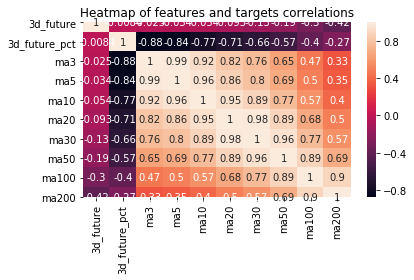

<Figure size 432x288 with 0 Axes>

In [25]:
sns.heatmap(corr, annot=True)
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.title("Heatmap of features and targets correlations")
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot
plt.clf()  # clear the plot area

### Linear Model

In [48]:
# Import the statsmodels.api library with the alias sm
import statsmodels.api as sm

# Add a constant to the features
linear_features = sm.add_constant(features)

# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.85 * features.shape[0])
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:]
test_targets = targets[train_size:]
print(linear_features.shape, train_features.shape, test_features.shape)

(1228, 10) (1043, 10) (185, 10)


/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

lin_afd = LinearRegression()
lin_afd.fit(train_features, train_targets)

# Check the score on train and test
print(lin_afd.score(train_features, train_targets))
print(lin_afd.score(test_features, test_targets))

#Check Root mean squared error
lin_afd_pred = lin_afd.predict(test_features)
print(sqrt(mean_squared_error(lin_afd_pred, test_targets)))

0.2718888160518852
-10.832083633070537
2.3497390221383414


### Decision Tree

In [50]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree_allen_afd = DecisionTreeRegressor(max_depth=3)

# Fit the model to the training features and targets
decision_tree_allen_afd.fit(train_features, train_targets)

# Check the score on train and test
print(decision_tree_allen_afd.score(train_features, train_targets))
print(decision_tree_allen_afd.score(test_features, test_targets))

#Check Root mean squared error
decision_tree_allen_afd_pred = decision_tree_allen_afd.predict(test_features)
print(sqrt(mean_squared_error(decision_tree_allen_afd_pred, test_targets)))

0.5218729816940997
-12.99212590695537
2.5552351094696575


In [51]:
# Loop through a few different max depths and check the performance
for d in [3, 5, 10, 15, 20, 25]:
    # Create the tree and fit it
    decision_tree_allen_afd = DecisionTreeRegressor(max_depth=d)
    decision_tree_allen_afd.fit(train_features, train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree_allen_afd.score(train_features, train_targets))
    print(decision_tree_allen_afd.score(test_features, test_targets), '\n')

max_depth= 3
0.5218729816940997
-12.992125906955385 

max_depth= 5
0.6822069437210256
-14.707761502914522 

max_depth= 10
0.9446960189008589
-25.30692883793139 

max_depth= 15
0.999958985352369
-23.842239005463142 

max_depth= 20
0.999999954407119
-23.3554557625431 

max_depth= 25
0.9999999999549162
-22.77882960026749 



1.7460058169565493


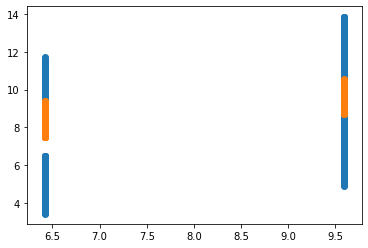

In [52]:
# Use the best max_depth of 3 from last exercise to fit a decision tree
decision_tree_allen_afd = DecisionTreeRegressor(max_depth=1)
decision_tree_allen_afd.fit(train_features, train_targets)

# Predict values for train and test
train_predictions = decision_tree_allen_afd.predict(train_features)
test_predictions = decision_tree_allen_afd.predict(test_features)

#Check Root mean squared error
decision_tree_allen_afd_pred = decision_tree_allen_afd.predict(test_features)
print(sqrt(mean_squared_error(decision_tree_allen_afd_pred, test_targets)))

# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label = 'test')
plt.show()

### Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr_allen_afd = RandomForestRegressor(n_estimators=50)
rfr_allen_afd.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr_allen_afd.score(train_features, train_targets))
print(rfr_allen_afd.score(test_features, test_targets))

# Check RMSE
rfr_allen_afd_pred = rfr_allen_afd.predict(test_features)
print(sqrt(mean_squared_error(rfr_allen_afd_pred, test_targets)))

0.9890668083811233
-18.84132433935207
3.042806547684667


In [54]:
from sklearn.model_selection import ParameterGrid

# Create a dictionary of hyperparameters to search
grid = {'n_estimators': [50,100,200,300], 'max_depth': [3], 'max_features': [4, 8], 'random_state': [42]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr_allen_afd.set_params(**g)  # ** is "unpacking" the dictionary
    rfr_allen_afd.fit(train_features, train_targets)
    test_scores.append(rfr_allen_afd.score(test_features, test_targets))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

-9.320904306647165 {'random_state': 42, 'n_estimators': 300, 'max_features': 4, 'max_depth': 3}


0.544299581600618
-9.320904306647165
2.1945621753796645


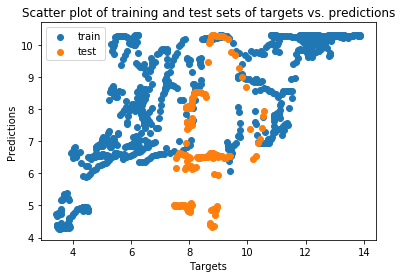

In [55]:
# Use the best hyperparameters from before to fit a random forest model
rfr_allen_afd = RandomForestRegressor(n_estimators=300, max_depth=3, max_features=4, random_state=42)
rfr_allen_afd.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = rfr_allen_afd.predict(train_features)
test_predictions = rfr_allen_afd.predict(test_features)

# Look at the R^2 scores on train and test
print(rfr_allen_afd.score(train_features, train_targets))
print(rfr_allen_afd.score(test_features, test_targets))

# Check RMSE
rfr_allen_afd_pred = rfr_allen_afd.predict(test_features)
print(sqrt(mean_squared_error(rfr_allen_afd_pred, test_targets)))

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_targets, train_predictions, label='train')
plt.scatter(test_targets, test_predictions, label='test')
plt.title('Scatter plot of training and test sets of targets vs. predictions')
plt.xlabel('Targets')
plt.ylabel('Predictions')
plt.legend()
plt.show()

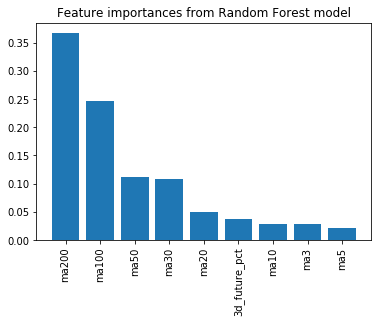

In [56]:
# Get feature importances from our random forest model
importances = rfr_allen_afd.feature_importances_
importances = importances[importances != 0]

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

# Create tick labels 
labels = np.array(feature_names)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical
plt.xticks(rotation=90)
plt.title("Feature importances from Random Forest model")
plt.show()

### Gradient Boosting

In [57]:
# Gradient Boosting Model 
from sklearn.ensemble import GradientBoostingRegressor

# Create GB model
gbr_allen_afd = GradientBoostingRegressor(max_features=4,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)
result_gbr = gbr_allen_afd.fit(train_features, train_targets)

print(gbr_allen_afd.score(train_features, train_targets))
print(gbr_allen_afd.score(test_features, test_targets))

# Check RMSE
gbr_allen_afd_pred = gbr_allen_afd.predict(test_features)
print(sqrt(mean_squared_error(gbr_allen_afd_pred, test_targets)))

0.6044838055204318
-9.56290925927674
2.2201421822340435


### XGBoost

In [58]:
# XGBoost Model
from xgboost import XGBRegressor
import xgboost as xgb

# Create the xgboost model and fit to the training data

xgb_model_allen_afd = XGBRegressor(colsample_bytree = 0.7, learning_rate= 0.01, max_depth= 7, min_child_weight= 4, n_estimators= 500, nthread= 4, objective= 'reg:linear', silent= 1, subsample= 0.7)
result_xgb = xgb_model_allen_afd.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(xgb_model_allen_afd.score(train_features, train_targets))
print(xgb_model_allen_afd.score(test_features, test_targets))

# Check RMSE
xgb_model_allen_afd_pred = xgb_model_allen_afd.predict(test_features)
print(sqrt(mean_squared_error(xgb_model_allen_afd_pred, test_targets)))

/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


0.9835956478543258
-17.7326262536892
2.9565712405241835
